In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from models.cnn_v1.cnn_normalize import prepare_data, normalize_data, prepare_sequences, split_train_and_test_data, get_cnn_data
from utils.chart import config_chart
from constants import SP500_TICKER


---

## For **prepare_data** function

In [3]:
data = prepare_data(SP500_TICKER)
data

,Close
Date,
2000-01-03,1455.219971
2000-01-04,1399.420044
2000-01-05,1402.109985
2000-01-06,1403.449951
2000-01-07,1441.469971
...,...
2024-01-25,4894.160156
2024-01-26,4890.970215
2024-01-29,4927.930176


In [4]:
data.dtypes

Close    float64
dtype: object

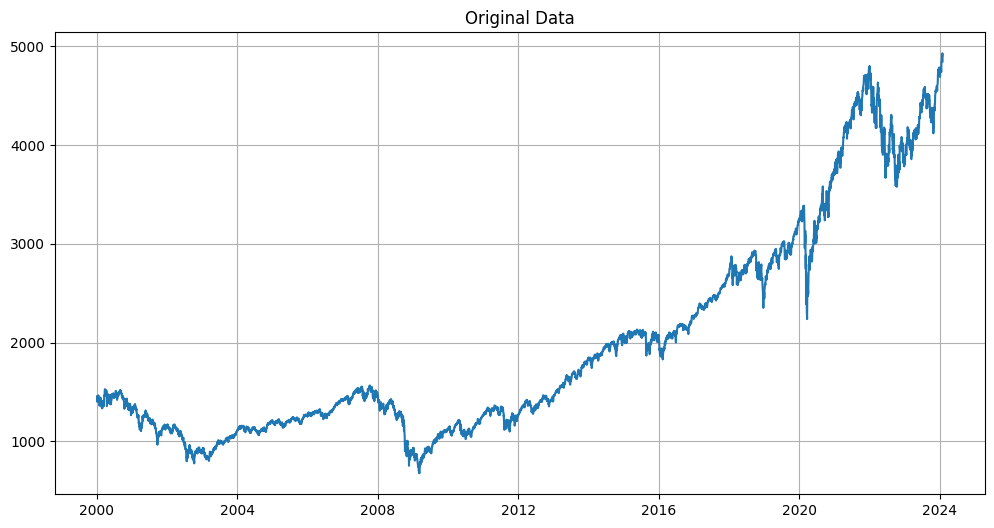

In [5]:
plt = config_chart('Original Data')
plt.plot(data)

---

## For **normalize_data** function

In [6]:
normalized_data = normalize_data(data)
normalized_data

,Close
Date,
2000-01-03,0.183161
2000-01-04,0.170036
2000-01-05,0.170668
2000-01-06,0.170984
2000-01-07,0.179927
...,...
2024-01-25,0.992057
2024-01-26,0.991306
2024-01-29,1.000000


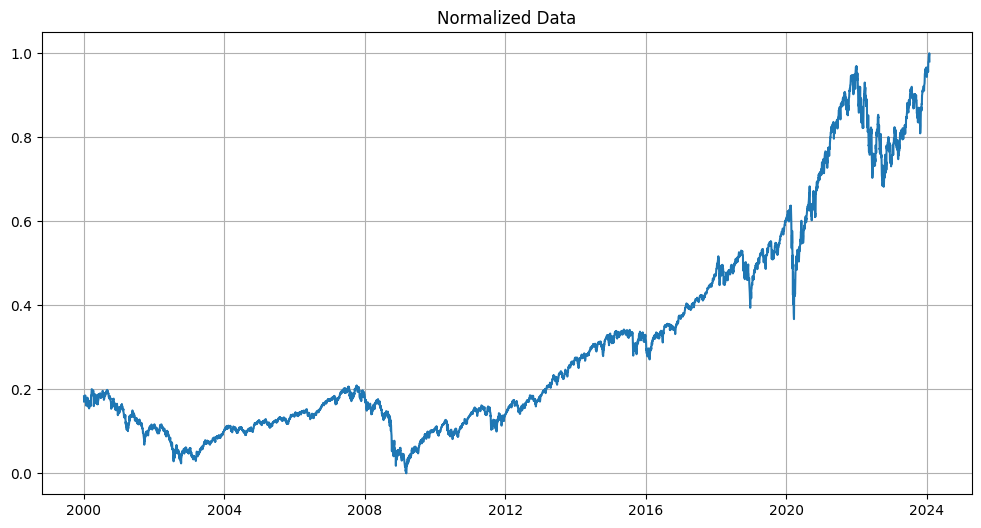

In [7]:
plt = config_chart('Normalized Data')
plt.plot(normalized_data)

----

## For **prepare_sequences** function

In [8]:
sequences = prepare_sequences(normalized_data)

In [9]:
sequences.x.shape, sequences.y.shape, sequences.dates.shape

((6048, 10), (6048,), (6048,))

In [10]:
sequences.x[0]

array([0.18316082, 0.17003575, 0.17066847, 0.17098365, 0.17992659,
       0.18372064, 0.17924213, 0.1777579 , 0.18185774, 0.18549653])

In [11]:
sequences.x

array([[0.18316082, 0.17003575, 0.17066847, ..., 0.1777579 , 0.18185774,
        0.18549653],
       [0.17003575, 0.17066847, 0.17098365, ..., 0.18185774, 0.18549653,
        0.18314201],
       [0.17066847, 0.17098365, 0.17992659, ..., 0.18549653, 0.18314201,
        0.18332078],
       ...,
       [0.96610526, 0.96190662, 0.95560987, ..., 0.98603275, 0.99205673,
        0.9913064 ],
       [0.96190662, 0.95560987, 0.96542545, ..., 0.99205673, 0.9913064 ,
        1.        ],
       [0.95560987, 0.96542545, 0.97927268, ..., 0.9913064 , 1.        ,
        0.99930377]])

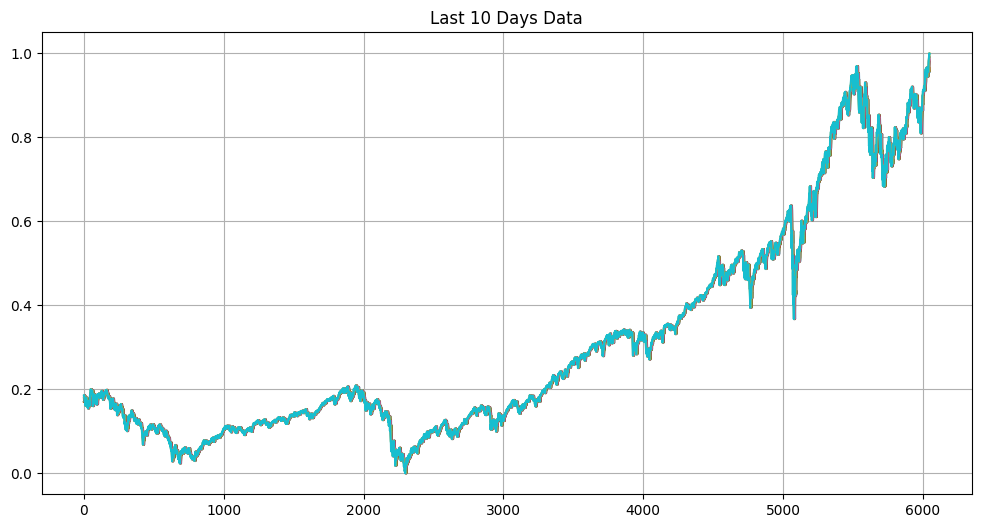

In [12]:
# plot_chart_line(x, label='Price', title='Data')
plt = config_chart('Last 10 Days Data')
plt.plot(sequences.x)

In [13]:
sequences.y[0]

0.18314201404810626

In [14]:
sequences.y

array([0.18314201, 0.18332078, 0.18089097, ..., 1.        , 0.99930377,
       0.98064631])

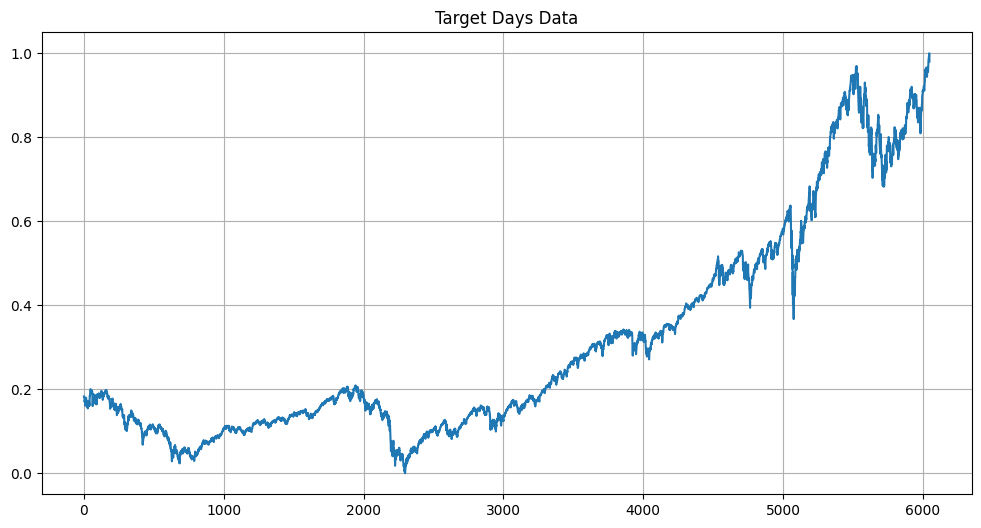

In [15]:
plt = config_chart('Target Days Data')
plt.plot(sequences.y)

In [16]:
sequences.dates

array(['2000-01-18T00:00:00.000000000', '2000-01-19T00:00:00.000000000',
       '2000-01-20T00:00:00.000000000', ...,
       '2024-01-29T00:00:00.000000000', '2024-01-30T00:00:00.000000000',
       '2024-01-31T00:00:00.000000000'], dtype='datetime64[ns]')

---

## For **split_train_and_test_data** function

In [17]:
train, test, predict = split_train_and_test_data(sequences)

In [18]:
train.x.shape, train.y.shape, train.dates.shape

((4838, 10), (4838,), (4838,))

In [19]:
test.x.shape, test.y.shape, test.dates.shape

((605, 10), (605,), (605,))

In [20]:
predict.x.shape, predict.y.shape, predict.dates.shape

((605, 10), (605,), (605,))

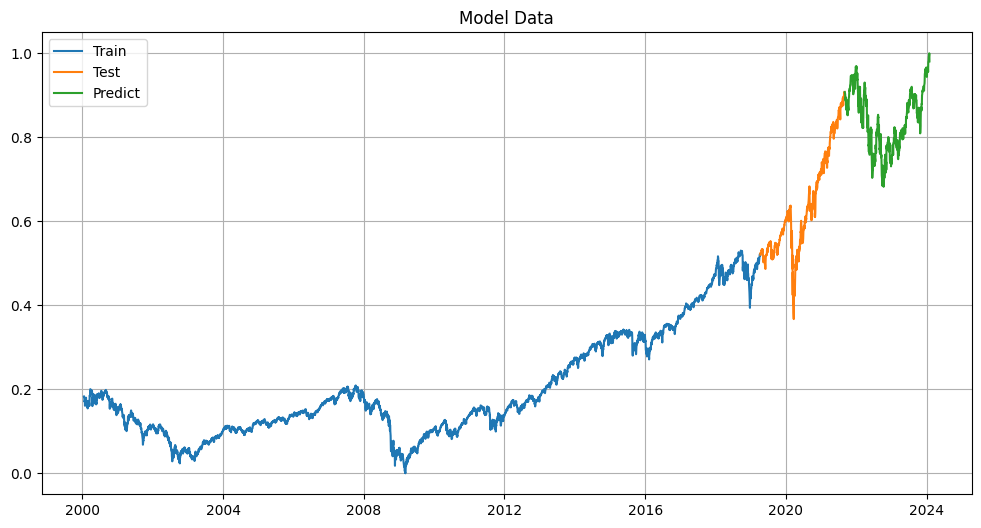

In [21]:
plt = config_chart('Model Data')
plt.plot(train.dates, train.y)
plt.plot(test.dates, test.y)
plt.plot(predict.dates, predict.y)
plt.legend(['Train', 'Test', 'Predict'])

---

## For **get_cnn_data** function

In [22]:
train, test, predict = get_cnn_data(SP500_TICKER)

In [23]:
print(train.dates.shape) 
print(train.dates[0])

print(train.x.shape) 
print(train.x[0])

print(train.y.shape)
print(train.y[0])

(4838,)
2000-01-18T00:00:00.000000000
(4838, 10)
[0.18316082 0.17003575 0.17066847 0.17098365 0.17992659 0.18372064
 0.17924213 0.1777579  0.18185774 0.18549653]
(4838,)
0.18314201404810626


In [25]:
print(test.dates.shape) 
print(test.dates[0])

print(test.x.shape) 
print(test.x[0])

print(test.y.shape)
print(test.y[0])

(605,)
2019-04-11T00:00:00.000000000
(605, 10)
[0.50310717 0.50756687 0.51527963 0.51529141 0.51674032 0.51814927
 0.52128943 0.52200214 0.51786937 0.52022389]
(605,)
0.5202497913285116


In [26]:
print(predict.dates.shape) 
print(predict.dates[0])

print(predict.x.shape) 
print(predict.x[0])

print(predict.y.shape)
print(predict.y[0])

(605,)
2021-09-03T00:00:00.000000000
(605, 10)
[0.8856235  0.89452877 0.89610477 0.89844752 0.89228721 0.90154772
 0.9061156  0.90467846 0.90501004 0.90803501]
(605,)
0.9076774741317701
